[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NNDesignDeepLearning/NNDesignDeepLearning/blob/master/06.TensorFlowIntroChapter/Code/LabSolutions/TensorFlowIntroLab1_Solution.ipynb)

# TensorFlow Introduction Lab 1 -- Getting Started

This objective of this TensorFlow lab is to help you become familiar with the basics of using TensorFlow to load data, create multilayer networks, train the networks and display the results. If you haven't already done so, run the cells in the `TensorFlowIntroChapter.ipynb` Jupyter Notebook to prepare for this lab.

Some of the cells in this notebook are prefilled with working code. In addition, there will be cells with missing code (labeled `# TODO`), which you will need to complete. If you need additional cells, you can use the `Insert` menu at the top of the page.

## Loading Modules

We begin by loading some useful modules.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.data import Dataset
from tensorflow.keras import datasets

# Loading Data

For this lab we will use a famous data set -- MNIST. This is a large database of handwritten digits. It contains 60,000 training images and 10,000 testing images. Each image consists of arrays of 28x28 pixels. The original website for the data, which describes the dataset in detail, and records accuracies using various machine learning strategies, can be found [here](http://yann.lecun.com/exdb/mnist/). The data set can be accessed easily using `tensorflow.keras.datasets`, as illustrated in the next cell.

In [2]:
(p_train, t_train), (p_test, t_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In the next cell, check the sizes of the arrays.

In [3]:
print(np.size(p_train))
print(np.size(t_train))
print(np.size(p_test))
print(np.size(t_test))

47040000
60000
7840000
10000


Let's take a look at one of the input images in the training set.

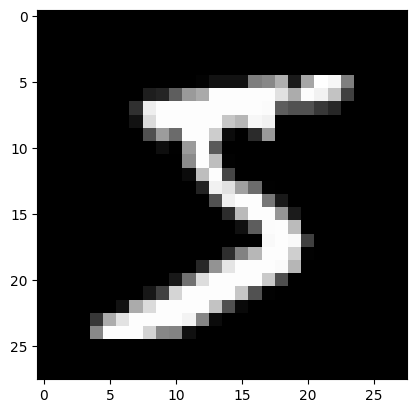

In [4]:
plt.imshow(p_train[0], cmap='gray')

What digit is this supposed to be? Check the corresponding target value in the next cell.

In [ ]:
print(#TODO)

The targets are represented as integers 0 through 9. We need to perform a one-hot encoding of the targets, so that they can be used for network training. Use the `to_categorical` method to do the conversion on training and testing targets.

In [ ]:
t_train = #TODO
t_test = #TODO

Check the conversion.

In [ ]:
print(t_train[0])

It is also useful to normalize the inputs. In this case, the maximum pixel values in the images is 255, so a simple normalization is to divide all inputs by 255.0, so that inputs will range from 0 to 1. Perform that normalization on the training and testing inputs in the next cell.

In [ ]:
p_train = #TODO
p_test = #TODO

Put the training and testing data into two TensorFlow Datasets using `Dataset.from_tensor_slices()`.

In [ ]:
train_dataset = #TODO
test_dataset = #TODO

Group the data in the training and testing datasets into minibatches of size 100, using the `batch()` method.

In [ ]:
train_dataset = #TODO
test_dataset = #TODO

# Constructing the Model

Now that the data is loaded, the next step is to construct the model. Create a method that uses the sequential class to construct a multilayer network with three layers and returns the constructed model. To begin, use 10 neurons in each layer. For the first two `Dense` layers, use the relu activation function, and use the softmax activation function in the third `Dense` layer. Note that because the training inputs are 28x28 arrays, we need to convert them to vectors before going into the first `Dense` layer. This can be done with `layers.Flatten()`. Make this the first component of the network.

In [ ]:
def make_model():
    model = models.Sequential()
    #TODO
    return model

Use the method you just created to construct a model.

In [ ]:
model1 = make_model()

After constructing the model, you can display a summary with the `summary()` method.

In [ ]:
model1.summary()

# Training the Network

The first step in training the network is to compile the network. This assigns the training function and the performance (loss) function. Use `adam` as the training function and `categorical_crossentropy` as the loss function. When compiling, you can also specify that certain metrics be saved during training. Metrics are often measures of performance that are not explicitly optimized. Add `metrics=['accuracy']` to the compile step to save accuracy during training.

Compile the model.

In [ ]:
model1.compile(#TODO)

Now use `model.fit` to train the network.  Pass the training Dataset and assign epochs to 100.

In [ ]:
history = model1.fit(#TODO)

Plot the training accuracy vs. epochs. The accuracy is stored in the `history.history` dictionary with key `'accuracy'`.

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
epochs = history.epoch
plt.plot(epochs, acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.show()

# Evaluate the Trained Model

We can use the evaluate method on the testing data to see how well the model will generalize.

In [ ]:
score = model1.evaluate(test_dataset, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Using Callbacks

When using the fit method, it is possible to assign **callbacks**, which perform certain opertions during the training process. You can find more about callbacks [here](https://keras.io/api/callbacks/) and [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

You will remember from the Python Lab 1 that we built a learning rate method that updated the learning rate during the training process. We can do the same thing in TensorFlow using the `LearningRateScheduler` callback.

First, let's define the same learning rate schedule class that we used in the Python Lab 1.

In [ ]:
class lr_inc_dec:
    def __init__(self, lr_0=0.001, lr_0_steps=5, lr_max = 0.005, lr_max_steps = 5, lr_min=0.0005, lr_decay=0.9):
        self.lr_0         = lr_0
        self.lr_max       = lr_max
        self.lr_0_steps   = lr_0_steps
        self.lr_max_steps = lr_max_steps
        self.lr_min       = lr_min
        self.lr_decay     = lr_decay

    def __call__(self, epoch):
        if epoch < self.lr_0_steps:
            self.lr = self.lr_0 + (self.lr_max - self.lr_0)*epoch/self.lr_0_steps
        elif epoch < self.lr_0_steps + self.lr_max_steps:
            self.lr = self.lr_max
        else:
            self.lr = self.lr_min + (self.lr_max - self.lr_min)*self.lr_decay**(epoch - self.lr_0_steps - self.lr_max_steps)

        return self.lr

In [ ]:
lr_scheduler = lr_inc_dec(lr_0=0.0005, lr_0_steps=10, lr_max = 0.002, lr_max_steps = 5, lr_min=0.001, lr_decay=0.95)

Now import the `LearningRateScheduler` from `tensorflow.keras.callbacks`.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

To access the scheduler during training, we add the following argument to the fit method: `callbacks=[]`, where inside the braces is a list of callbacks. In this case, there is only one callback, which should be `LearningRateScheduler(lr_scheduler, verbose=1)`. Here we have passed the scheduler we defined into the `LearningRateScheduler`. By using `verbose=1`, we can monitor the progress of the learning rate during training.

Make a new model.

In [ ]:
model2 = make_model()

Compile the model, with the adam optimizer, categorical_crossentropy loss and accuracy metric.

In [ ]:
model2.compile(#TODO)

Train the model with the `fit` method for 100 epochs, and use the `LearningRateScheduler` callback.

In [ ]:
history = model2.fit(#TODO)

Evaluate the new model on the test set.

In [ ]:
score2 = model2.evaluate(test_dataset, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

# Experimenting With Architectures

Try different network architectures to see if you can improve the performance. To make this easier, modify the `make_model()` function so that you can vary the number of layers and the number of neurons in each layer. Pass a list into the function that has the number of neurons in each hidden layer. The last (`softmax`) layer always has 10 neurons.

In [ ]:
def make_model(num_neurons):
    #TODO
    return model

Make a network with five hidden layers of 10 neurons, compile it with the `adam` optimizer, `categorical_crossentropy` loss and `accuracy` metric. Then train it with the default learning rate (no callbacks) for 100 epochs.

In [ ]:
model3 = #TODO
model3.compile(#TODO)
history = model3.fit(#TODO)

Plot the training accuracy vs epochs.

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
epochs = history.epoch
plt.plot(epochs, acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.show()

Based on your plot, do you think the accuracy will increase, if you  train the network longer?

Now evaluate the model on the test set.

In [ ]:
score3 = model3.evaluate(test_dataset, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])

How does the test accuracy compare to the training accuracy? Is the network overfitting, or can you improve the accuracy by adding neurons or layers to the network?

## Explore Further

Experiment with different network architectures. Try to find the architecture that gives you the best accuracy. Investigate the following.

1. Increase the number of neurons in each layer. How do training and testing accuracy change?
1. Increase the number of layers. Does the training (testing) accuracy continue to decrease? How high can you make the testing accuracy? Do you get better results increasing the number of neurons in each layer, or the number of layers (assuming the overal number of weights stays the same)?
1. Train a network twice without changing the architecture. (Be sure to remake the network each time.) Do you acheive the same accuracy? If not, explain why the accuracy is different.
1. Experiment with different optimizers and different learning rates.
1. Experiment with different batch sizes.
1. Increase the number of epochs, and plot the training accuracy. Use the plot to determine whether or not you should  increase the number of epochs further.